<a href="https://colab.research.google.com/github/DmytroMozghovyi/deep_learning/blob/main/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [2]:
from keras.datasets import cifar100
import numpy as np

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [5]:
class_names = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard",
    "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket",
    "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
    "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor",
    "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]

In [6]:
# @title Default title text
# Your Code Here
# Print dataset shapes
print("Training set shape:", x_train.shape, "Labels shape:", y_train.shape)
print("Test set shape:", x_test.shape, "Labels shape:", y_test.shape)

Training set shape: (50000, 32, 32, 3) Labels shape: (50000, 1)
Test set shape: (10000, 32, 32, 3) Labels shape: (10000, 1)


In [7]:
# Dataset details
num_classes = len(np.unique(y_train))
img_height, img_width, img_channels = x_train.shape[1:]
print(f"Image dimensions: {img_height}x{img_width}x{img_channels}")
print(f"Number of classes: {num_classes}")

Image dimensions: 32x32x3
Number of classes: 100


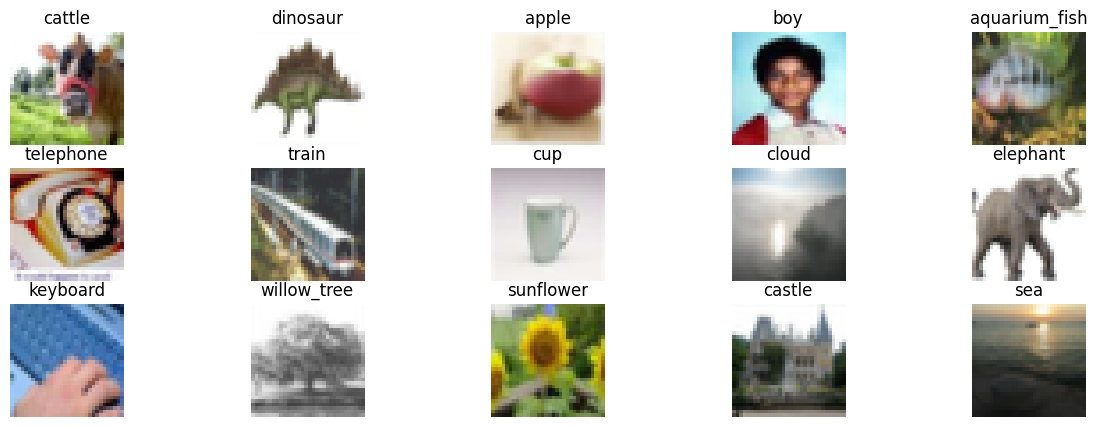

In [8]:
# Display some images with labels
import matplotlib.pyplot as plt

def show_images(images, labels, num=15):
    plt.figure(figsize=(15, 5))
    for i in range(num):
        plt.subplot(3, 5, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i][0]])
        plt.axis('off')
    plt.show()

show_images(x_train, y_train)

### 1b: Data Preprocessing
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [9]:
# Your Code Here
# Normalize the images to [0, 1] by dividing by 255
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [10]:
# One-hot encode the labels
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)

In [11]:
# Split the training set into training and validation sets (80% training, 20% validation)
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Verify the shapes of the data
print(f"Training data shape: {x_train.shape}, Validation data shape: {x_val.shape}, Test data shape: {x_test.shape}")


Training data shape: (40000, 32, 32, 3), Validation data shape: (10000, 32, 32, 3), Test data shape: (10000, 32, 32, 3)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [34]:
# Your Code Here
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Initialize the CNN model
model = Sequential()

In [35]:
# First Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from convolutional layers to feed into dense layers
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(512, activation='relu'))

# Dropout layer to reduce overfitting
model.add(Dropout(0.5))

# Output Layer (100 classes for CIFAR-100 dataset)
model.add(Dense(100, activation='softmax'))

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> Categorical Crossentropy.
Choice: Since this is a multi-class classification problem (with 100 classes), we use categorical crossentropy. This loss function compares the predicted probability distribution (from the softmax output) with the true distribution (one-hot encoded labels) and calculates the error, which is minimized during training.
- <b>Optimizer:</b> Adam.
Choice: Adam is a popular and effective optimizer that combines the advantages of both RMSprop and AdaGrad. It adapts the learning rate based on the first and second moments of the gradients, making it well-suited for training deep learning models. Adam is efficient and typically works well for many image classification tasks.

In [36]:
# Your Code Here
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Print out the model summary
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 100)                 │          51,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,193,636 (4.55 MB)

 Trainable params: 1,193,636 (4.55 MB)

 Non-trainable params: 0 (0.00 B)

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [37]:
# Your Code Here
from tensorflow.keras.callbacks import EarlyStopping

# Early Stopping to prevent over-training
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

## Train the model
history = model.fit(
    x_train, y_train,
    epochs=50,            # We'll stick with 50 epochs
    batch_size=32,        # Using the batch size you wanted
    validation_data=(x_val, y_val),  # Validation as requested
    callbacks=[early_stopping],      # Automatically stop if it overfits
    verbose=2
)

Epoch 1/50
1250/1250 - 111s - 89ms/step - accuracy: 0.0901 - loss: 3.9742 - val_accuracy: 0.1825 - val_loss: 3.4174
Epoch 2/50
1250/1250 - 140s - 112ms/step - accuracy: 0.2044 - loss: 3.2795 - val_accuracy: 0.2645 - val_loss: 2.9893
Epoch 3/50
1250/1250 - 143s - 114ms/step - accuracy: 0.2670 - loss: 2.9389 - val_accuracy: 0.3180 - val_loss: 2.7192
Epoch 4/50
1250/1250 - 142s - 114ms/step - accuracy: 0.3151 - loss: 2.7055 - val_accuracy: 0.3474 - val_loss: 2.5863
Epoch 5/50
1250/1250 - 138s - 110ms/step - accuracy: 0.3486 - loss: 2.5362 - val_accuracy: 0.3616 - val_loss: 2.4893
Epoch 6/50
1250/1250 - 147s - 117ms/step - accuracy: 0.3790 - loss: 2.3838 - val_accuracy: 0.3878 - val_loss: 2.3905
Epoch 7/50
1250/1250 - 141s - 113ms/step - accuracy: 0.4097 - loss: 2.2405 - val_accuracy: 0.3932 - val_loss: 2.3741
Epoch 8/50
1250/1250 - 142s - 113ms/step - accuracy: 0.4279 - loss: 2.1279 - val_accuracy: 0.4030 - val_loss: 2.3314
Epoch 9/50
1250/1250 - 139s - 111ms/step - accuracy: 0.4552 - los

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> 58%
- <b>Other metric:</b> Categorical Crossentropy Loss
- <b>Reason for selection:</b> Loss measures how well the model's predicted probabilities match the true labels.
Lower values indicate better predictions.
It is directly used during training with the categorical_crossentropy function, making it a key indicator of model performance.
- <b>Value of metric:</b> 1.4657
- <b>Interpretation of metric value:</b> Lower Loss (~1.5): Model is making confident and correct predictions.

In [ ]:
# Your Code Here

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

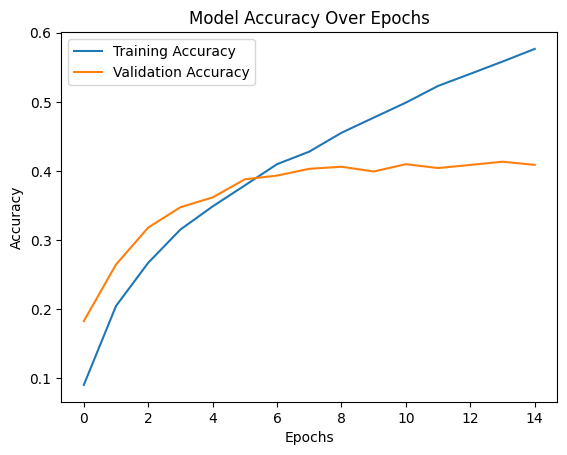

In [38]:
# Your Code Here
import matplotlib.pyplot as plt

# Plot Training vs. Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.legend()
plt.show()

In [39]:
import numpy as np

# Get predictions on the test set
predictions = model.predict(x_test)

# Convert probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Identify a correct and incorrect prediction
correct_index = np.where(predicted_labels == true_labels)[0][0]
incorrect_index = np.where(predicted_labels != true_labels)[0][0]

print(f"✅ Correct Prediction: True = {true_labels[correct_index]}, Predicted = {predicted_labels[correct_index]}")
print(f"❌ Incorrect Prediction: True = {true_labels[incorrect_index]}, Predicted = {predicted_labels[incorrect_index]}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
✅ Correct Prediction: True = 33, Predicted = 33
❌ Incorrect Prediction: True = 49, Predicted = 30


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


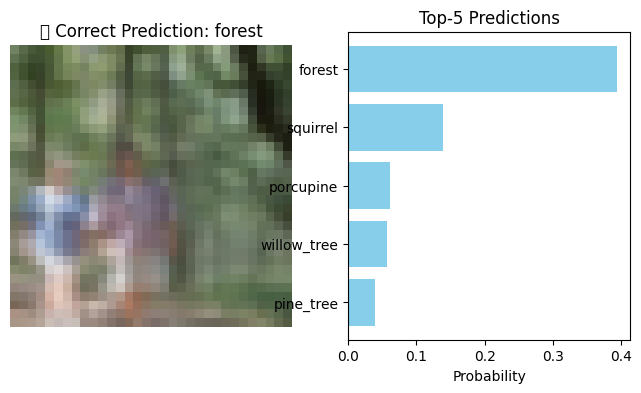

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


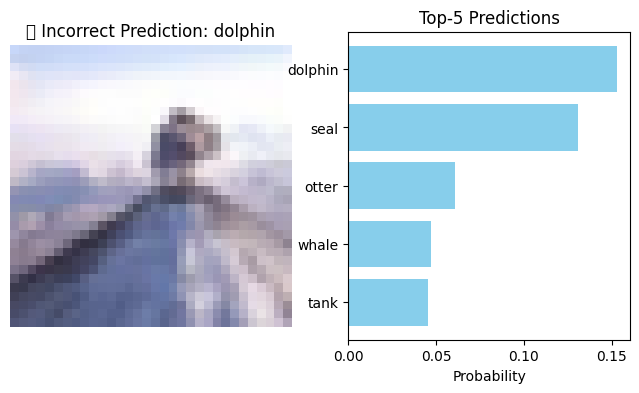

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display image and plot class probabilities
def plot_image_with_probs(index, title):
    # Display the image
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)  # Image on the left
    plt.imshow(x_test[index])
    plt.title(title)
    plt.axis('off')

    # Get the top-5 predicted classes and probabilities
    top_5_indices = np.argsort(predictions[index])[-5:][::-1]
    top_5_probs = predictions[index][top_5_indices]
    top_5_labels = [cifar100_classes[i] for i in top_5_indices]

    # Plot the top-5 probabilities as a bar chart
    plt.subplot(1, 2, 2)  # Bar chart on the right
    plt.barh(top_5_labels[::-1], top_5_probs[::-1], color='skyblue')
    plt.xlabel('Probability')
    plt.title('Top-5 Predictions')
    plt.show()

# Display correct and incorrect predictions
plot_image_with_probs(correct_index, f"✅ Correct Prediction: {cifar100_classes[predicted_labels[correct_index]]}")
plot_image_with_probs(incorrect_index, f"❌ Incorrect Prediction: {cifar100_classes[predicted_labels[incorrect_index]]}")

Interpretation

Correct Prediction:
The true class should have the highest probability.
Incorrect Prediction:
Visually similar classes may rank higher than the correct one.

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [69]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers

# Define L2 regularization strength
l2_strength = 0.0001

# CNN Model with L2 Regularization
l2_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3),
                  kernel_regularizer=regularizers.l2(l2_strength)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(l2_strength)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(l2_strength)),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu',
                 kernel_regularizer=regularizers.l2(l2_strength)),
    layers.Dense(100, activation='softmax')
])

# Compile the model
l2_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Train the model
l2_history = l2_model.fit(x_train, y_train,
                          validation_data=(x_val, y_val),
                          epochs=15,
                          batch_size=32)

# Evaluate the model
test_loss, test_acc = l2_model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")


Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 63s 49ms/step - accuracy: 0.0431 - loss: 4.3220 - val_accuracy: 0.1494 - val_loss: 3.6111
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.1702 - loss: 3.4939 - val_accuracy: 0.2155 - val_loss: 3.2581
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 61s 48ms/step - accuracy: 0.2332 - loss: 3.1299 - val_accuracy: 0.2644 - val_loss: 3.0378
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 49ms/step - accuracy: 0.2805 - loss: 2.9253 - val_accuracy: 0.2815 - val_loss: 2.9415
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.3154 - loss: 2.7496 - val_accuracy: 0.3150 - val_loss: 2.8067
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.3466 - loss: 2.6130 - val_accuracy: 0.3269 - val_loss: 2.7584
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.3685 - loss: 2.5088 - val_accuracy: 0.3345 - val_loss: 2.7210
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.3879 -

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

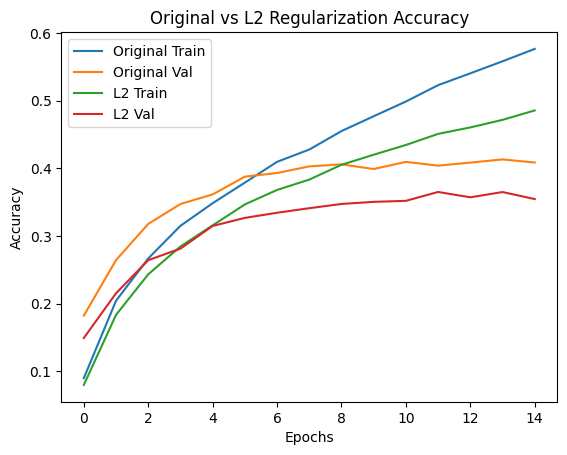

In [70]:
# Your Code Here
import matplotlib.pyplot as plt

# Compare Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Original Train')
plt.plot(history.history['val_accuracy'], label='Original Val')
plt.plot(l2_history.history['accuracy'], label='L2 Train')
plt.plot(l2_history.history['val_accuracy'], label='L2 Val')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Original vs L2 Regularization Accuracy')
plt.show()


### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here
After implementing L2 regularization, the model’s performance decreased, with both lower accuracy and higher loss. This suggests that the regularization penalty was too strong, causing the model to underfit the training data. The L2 penalty constrains the model’s weights, which can hurt performance if the model already generalizes well without it.

The decline in performance is likely due to over-regularization, meaning the model cannot fully capture the complexity of the CIFAR-100 dataset. Reducing the L2 coefficient (e.g., from 0.001 to 0.0001) may strike a better balance between bias and variance.

There is room for further improvement by exploring other techniques such as Dropout (to randomly deactivate neurons and prevent overfitting) or Batch Normalization (to stabilize learning and improve convergence). Additionally, experimenting with learning rate schedules may allow better exploration of the loss surface.

In the future, I would explore a smaller L2 value, combine L2 with Dropout, or try data augmentation to increase model robustness without relying solely on weight penalties.


## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.